# <div class="alert alert-info" align="center" font color="red">  DNN Regression</div>

## <font color=red>**1 Introduction**</font>

The goal is to group similar instances together into clusters. This is a great tool for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more

---
# <div class="alert alert-info"> Setup </div>

## <font color=red>**2.1. Import library**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Mai\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


---
# <div class="alert alert-info"> KC House </div>

 ## <font color=red>**1. Data**</font>

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df = pd.read_csv('../00-Data/data/kc_house_data.csv')
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## <font color=red>**2. Data Processing**</font>

In [5]:
# select features
selected_features = df.drop(['id','zipcode','date','price'], axis=1).columns

# Split data
X = df[selected_features]
y = df['price']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=101)

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train.shape, X_valid.shape, X_test.shape
y_train.shape, y_valid.shape, y_test.shape

((13832,), (3458,), (4323,))

## <font color=red>**3. Model**</font>

 ### <font color=blue>**Define model Architecture**

In [17]:
keras.backend.clear_session()
np.random.seed(99)
tf.random.set_seed(99)

# Initialize
model = Sequential()

# Add layers
model.add(Dense(30, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mse')

 ### <font color=blue>**Training model**
    
Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* **Sample**: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* **Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* **Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using **validation_data or validation_split** with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, **there is the ability to add callbacks specifically designed to be run at the end of an epoch**. Examples of these are learning rate changes and model checkpointing (saving).    

In [18]:
model.fit(x=X_train, y=y_train.values, validation_data=(X_valid, y_valid.values), batch_size=5, epochs=50)

Epoch 1/50
2767/2767 [==============================] - 4s 1ms/step - loss: 185543933952.0000 - val_loss: 104456536064.0000
Epoch 2/50
2767/2767 [==============================] - 4s 2ms/step - loss: 88374444032.0000 - val_loss: 95162736640.0000
Epoch 3/50
2767/2767 [==============================] - 4s 1ms/step - loss: 79075082240.0000 - val_loss: 84753637376.0000
Epoch 4/50
2767/2767 [==============================] - 5s 2ms/step - loss: 69416845312.0000 - val_loss: 74298253312.0000
Epoch 5/50
2767/2767 [==============================] - 5s 2ms/step - loss: 60204171264.0000 - val_loss: 65077174272.0000
Epoch 6/50
2767/2767 [==============================] - 5s 2ms/step - loss: 54019432448.0000 - val_loss: 59877986304.0000
Epoch 7/50
2767/2767 [==============================] - 4s 1ms/step - loss: 50591698944.0000 - val_loss: 57032880128.0000
Epoch 8/50
2767/2767 [==============================] - 4s 1ms/step - loss: 48742367232.0000 - val_loss: 55006658560.0000
Epoch 9/50
2767/2767 [

 ### <font color=blue>**Plot loss history**

<Axes: >

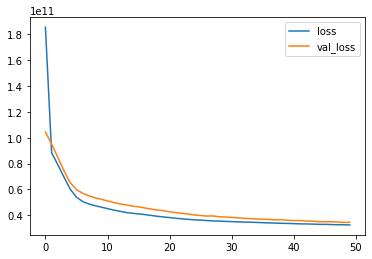

In [19]:
loss_hist = pd.DataFrame(model.history.history)
loss_hist.plot()

 ### <font color=blue>**Performance Evaluation**

In [20]:
print(model.history.params)
print(model.history.epoch)
print(model.history.history.keys())
print(model.metrics_names)

{'verbose': 1, 'epochs': 50, 'steps': 2767}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
dict_keys(['loss', 'val_loss'])
['loss']


#### Accuracy

In [21]:
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
training_score, test_score

(32449710080.0, 31163226112.0)

In [19]:
# prediction
y_test_pred = model.predict(X_test)
# MAE
print('MAE: ', mean_absolute_error(y_test, y_test_pred))
# RMSE
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# R-square
print('R-squared: ', explained_variance_score(y_test, y_test_pred))

MAE:  107048.54628585473
RMSE:  176531.0988756957
R-squared:  0.772215004968877


#### Prediction plot

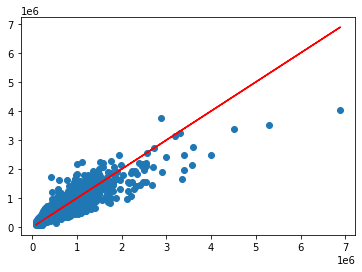

In [20]:
# Prediction
plt.scatter(y_test, y_test_pred)
# Perfect prediction
plt.plot(y_test, y_test, 'r')

#### Error distribution plot

In [24]:
y_test_pred.shape

(4323, 1)

<Axes: ylabel='Density'>

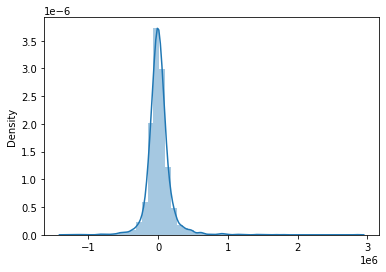

In [25]:
errors = y_test.values - y_test_pred[:,0]
sns.distplot(errors)

 ### <font color=blue>**Prediction on a new object**

In [26]:
single_house = df[selected_features].iloc[0]
single_house = scaler.transform(single_house.values.reshape(1,len(single_house)))
model.predict(single_house)

array([[277236.12]], dtype=float32)

In [27]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(len(X_test),))
test_predictions[0:5]

0    471332.5625
1    597283.6250
2    491034.8125
3    320120.1250
4    171197.6250
dtype: float32

## <font color=red>**4. Using checkpoint to save the best model**</font>

 ### <font color=blue>**Using checkpoint**

In [28]:
keras.backend.clear_session()
np.random.seed(99)
tf.random.set_seed(99)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])
# compile
model.compile(loss='mse', optimizer='adam')
# using checkpoint to save the best model
checkpoint_cb = keras.callbacks.ModelCheckpoint('kc_house.h5', save_best_only=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                540       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,431
Trainable params: 2,431
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(x=X_train, y=y_train.values,
                    validation_data = (X_valid, y_valid.values),
                    batch_size=5,
                    epochs=100,
                    callbacks=[checkpoint_cb]
                   )

Epoch 1/100
2767/2767 [==============================] - 5s 2ms/step - loss: 185543933952.0000 - val_loss: 104456536064.0000
Epoch 2/100
2767/2767 [==============================] - 5s 2ms/step - loss: 88374444032.0000 - val_loss: 95162736640.0000
Epoch 3/100
2767/2767 [==============================] - 5s 2ms/step - loss: 79075082240.0000 - val_loss: 84753637376.0000
Epoch 4/100
2767/2767 [==============================] - 5s 2ms/step - loss: 69416845312.0000 - val_loss: 74298253312.0000
Epoch 5/100
2767/2767 [==============================] - 5s 2ms/step - loss: 60204171264.0000 - val_loss: 65077174272.0000
Epoch 6/100
2767/2767 [==============================] - 4s 1ms/step - loss: 54019432448.0000 - val_loss: 59877986304.0000
Epoch 7/100
2767/2767 [==============================] - 4s 2ms/step - loss: 50591698944.0000 - val_loss: 57032880128.0000
Epoch 8/100
2767/2767 [==============================] - 3s 1ms/step - loss: 48742367232.0000 - val_loss: 55006658560.0000
Epoch 9/100
27

2767/2767 [==============================] - 5s 2ms/step - loss: 31315056640.0000 - val_loss: 32922826752.0000
Epoch 68/100
2767/2767 [==============================] - 5s 2ms/step - loss: 31328894976.0000 - val_loss: 32811857920.0000
Epoch 69/100
2767/2767 [==============================] - 6s 2ms/step - loss: 31106355200.0000 - val_loss: 33354758144.0000
Epoch 70/100
2767/2767 [==============================] - 6s 2ms/step - loss: 31237888000.0000 - val_loss: 32721727488.0000
Epoch 71/100
2767/2767 [==============================] - 5s 2ms/step - loss: 31161513984.0000 - val_loss: 32913584128.0000
Epoch 72/100
2767/2767 [==============================] - 5s 2ms/step - loss: 31027474432.0000 - val_loss: 32636426240.0000
Epoch 73/100
2767/2767 [==============================] - 5s 2ms/step - loss: 31061237760.0000 - val_loss: 32990427136.0000
Epoch 74/100
2767/2767 [==============================] - 5s 2ms/step - loss: 30955388928.0000 - val_loss: 32647761920.0000
Epoch 75/100
2767/276

In [30]:
y_test_pred = model.predict(X_test)
# MAE
print('MAE: ', mean_absolute_error(y_test, y_test_pred))
# RMSE
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
# R-square
print('R-squared: ', explained_variance_score(y_test, y_test_pred))

MAE:  103425.43875780707
RMSE:  168600.27782831254
R-squared:  0.7916459835323286


In [31]:
keras.backend.clear_session()
np.random.seed(99)
tf.random.set_seed(99)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs['val_loss']/logs['loss']))
        
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(30),
    keras.layers.Dense(1)
])

# compile
model.compile(loss='mse', optimizer='adam')
# using checkpoint to save the best model
val_train_ratio_cb = PrintValTrainRatioCallback()
checkpoint_cb = keras.callbacks.ModelCheckpoint('kc_house.h5', save_best_only=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                540       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,431
Trainable params: 2,431
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(x=X_train, y=y_train.values, 
                    validation_data=(X_valid, y_valid.values), 
                    batch_size=5, 
                    epochs=100,
                    callbacks=[val_train_ratio_cb, checkpoint_cb])

Epoch 1/100
2764/2767 [============================>.] - ETA: 0s - loss: 164815781888.0000
val/train: 0.61
2767/2767 [==============================] - 6s 2ms/step - loss: 164769202176.0000 - val_loss: 101328584704.0000
Epoch 2/100
2741/2767 [============================>.] - ETA: 0s - loss: 84077723648.0000
val/train: 1.06
2767/2767 [==============================] - 4s 1ms/step - loss: 84057309184.0000 - val_loss: 88905342976.0000
Epoch 3/100
2747/2767 [============================>.] - ETA: 0s - loss: 71754620928.0000
val/train: 1.05
2767/2767 [==============================] - 4s 2ms/step - loss: 71556120576.0000 - val_loss: 74888880128.0000
Epoch 4/100
2745/2767 [============================>.] - ETA: 0s - loss: 59434090496.0000
val/train: 1.07
2767/2767 [==============================] - 5s 2ms/step - loss: 59918680064.0000 - val_loss: 63816110080.0000
Epoch 5/100
2746/2767 [============================>.] - ETA: 0s - loss: 52469551104.0000
val/train: 1.10
2767/2767 [============

2752/2767 [============================>.] - ETA: 0s - loss: 32714364928.0000
val/train: 1.06
2767/2767 [==============================] - 5s 2ms/step - loss: 32617936896.0000 - val_loss: 34530537472.0000
Epoch 38/100
2756/2767 [============================>.] - ETA: 0s - loss: 32605368320.0000
val/train: 1.06
2767/2767 [==============================] - 5s 2ms/step - loss: 32514033664.0000 - val_loss: 34321502208.0000
Epoch 39/100
2746/2767 [============================>.] - ETA: 0s - loss: 32448397312.0000
val/train: 1.06
2767/2767 [==============================] - 5s 2ms/step - loss: 32372404224.0000 - val_loss: 34413334528.0000
Epoch 40/100
2747/2767 [============================>.] - ETA: 0s - loss: 32275697664.0000
val/train: 1.06
2767/2767 [==============================] - 6s 2ms/step - loss: 32278044672.0000 - val_loss: 34124527616.0000
Epoch 41/100
2748/2767 [============================>.] - ETA: 0s - loss: 32216739840.0000
val/train: 1.06
2767/2767 [=======================

Epoch 75/100
2752/2767 [============================>.] - ETA: 0s - loss: 29905819648.0000
val/train: 1.06
2767/2767 [==============================] - 5s 2ms/step - loss: 29870923776.0000 - val_loss: 31613073408.0000
Epoch 76/100
2735/2767 [============================>.] - ETA: 0s - loss: 29856270336.0000
val/train: 1.06
2767/2767 [==============================] - 4s 2ms/step - loss: 29887883264.0000 - val_loss: 31646791680.0000
Epoch 77/100
2743/2767 [============================>.] - ETA: 0s - loss: 29862535168.0000
val/train: 1.07
2767/2767 [==============================] - 4s 1ms/step - loss: 29791559680.0000 - val_loss: 31756222464.0000
Epoch 78/100
2756/2767 [============================>.] - ETA: 0s - loss: 29768783872.0000
val/train: 1.06
2767/2767 [==============================] - 5s 2ms/step - loss: 29731201024.0000 - val_loss: 31605450752.0000
Epoch 79/100
2753/2767 [============================>.] - ETA: 0s - loss: 29778837504.0000- ETA: 1s - 
val/train: 1.06
2767/2767

In [33]:
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 100, 'steps': 2767}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
dict_keys(['loss', 'val_loss'])


In [34]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

 ### <font color=blue>**Model Evaluation**

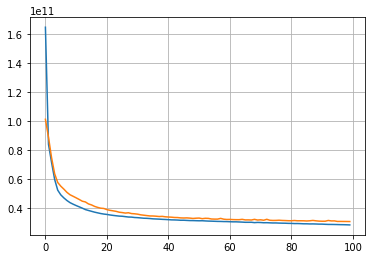

In [35]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

model = keras.models.load_model('kc_house.h5')  # roll back to the best model

# Train score, test score
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
test_predictions = model.predict(X_test)
print("Train score: %.2f" % training_score + ", Test score: %.2f" % test_score)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = mean_squared_error(y_test, test_predictions)
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_predictions)
print("MAE: %.3f"  % mae)
      
# r2 - coefficient of determination
r2 = explained_variance_score(y_test, test_predictions)
print("r2: %.3f" %r2)

Train score: 28283637760.00, Test score: 27232856064.00
RMSE: 165023.803
MSE: 27232855538.651
MAE: 101594.192
r2: 0.800


 ### <font color=blue>**Prediction**

In [37]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred[:3]

array([[516705.38],
       [602669.7 ],
       [486389.  ]], dtype=float32)

In [38]:
# Prediction
test_predictions = model.predict(X_test)

# Calculate error
pred_df = pd.DataFrame(y_test)
pred_df['Model Prediction'] =pd.Series(test_predictions.reshape(len(test_predictions),))
pred_df['Error'] = pred_df['price'] - pred_df['Model Prediction']
pred_df.head()

,price,Model Prediction,Error
0,349950.0,516705.375000,-166755.375000
1,450000.0,602669.687500,-152669.687500
2,635000.0,486389.000000,148611.000000
3,355500.0,314836.906250,40663.093750
4,246950.0,237527.390625,9422.609375


 ### <font color=blue>**Saving and Restoring**

In [40]:
model.save("kc_house.h5")
model = keras.models.load_model("kc_house.h5")
model.predict(X_new)

array([[516705.38],
       [602669.7 ],
       [486389.  ]], dtype=float32)

In [41]:
model.save_weights("kc_house_weights.ckpt")
model.load_weights("kc_house_weights.ckpt")

## <font color=red>**5. Tuning Model**</font>

 ### <font color=blue>**Early Stopping**

In [88]:
keras.backend.clear_session()
np.random.seed(99)
tf.random.set_seed(99)

def build_model(n_hidden=5, n_neurons=30, learning_rate=3e-3, input_shape=X_train.shape[1:], optimizer='adam'):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[early_stop])

Epoch 1/100
433/433 [==============================] - 1s 2ms/step - loss: 255936839680.0000 - val_loss: 101041479680.0000
Epoch 2/100
433/433 [==============================] - 1s 1ms/step - loss: 83153207296.0000 - val_loss: 87529750528.0000
Epoch 3/100
433/433 [==============================] - 1s 2ms/step - loss: 69744869376.0000 - val_loss: 72163246080.0000
Epoch 4/100
433/433 [==============================] - 1s 2ms/step - loss: 57396125696.0000 - val_loss: 60994945024.0000
Epoch 5/100
433/433 [==============================] - 1s 2ms/step - loss: 50507022336.0000 - val_loss: 55292928000.0000
Epoch 6/100
433/433 [==============================] - 1s 2ms/step - loss: 46909988864.0000 - val_loss: 51911929856.0000
Epoch 7/100
433/433 [==============================] - 1s 2ms/step - loss: 44155572224.0000 - val_loss: 49493254144.0000
Epoch 8/100
433/433 [==============================] - 1s 2ms/step - loss: 42204516352.0000 - val_loss: 46915829760.0000
Epoch 9/100
433/433 [=========

433/433 [==============================] - 1s 2ms/step - loss: 28474619904.0000 - val_loss: 30839848960.0000
Epoch 69/100
433/433 [==============================] - 1s 2ms/step - loss: 28180043776.0000 - val_loss: 30736877568.0000
Epoch 70/100
433/433 [==============================] - 1s 3ms/step - loss: 28331008000.0000 - val_loss: 30686662656.0000
Epoch 71/100
433/433 [==============================] - 1s 2ms/step - loss: 28114681856.0000 - val_loss: 30699986944.0000
Epoch 72/100
433/433 [==============================] - 1s 2ms/step - loss: 28100009984.0000 - val_loss: 30782525440.0000
Epoch 73/100
433/433 [==============================] - 1s 2ms/step - loss: 28005857280.0000 - val_loss: 31439587328.0000
Epoch 74/100
433/433 [==============================] - 1s 2ms/step - loss: 27957456896.0000 - val_loss: 30596063232.0000
Epoch 75/100
433/433 [==============================] - 1s 2ms/step - loss: 27845703680.0000 - val_loss: 30514520064.0000
Epoch 76/100
433/433 [===============

In [89]:
mse_test = keras_reg.score(X_test, y_test)

136/136 [==============================] - 0s 1ms/step - loss: 25510371328.0000


In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

model = keras_reg
# Train score, test score
training_score = keras_reg.score(X_train, y_train, verbose=0)
test_score = keras_reg.score(X_test, y_test, verbose=0)
test_predictions = keras_reg.predict(X_test)
print(training_score, test_score)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = mean_squared_error(y_test, test_predictions)
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_predictions)
print("MAE: %.3f"  % mae)
      
# r2 - coefficient of determination
r2 = explained_variance_score(y_test, test_predictions)
print("r2: %.3f" %r2)

-26241673216.0 -25510371328.0
RMSE: 159719.654
MSE: 25510367930.333
MAE: 99520.227
r2: 0.813


 ### <font color=blue>**RandomizedSearchCV**

In [91]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

keras.backend.clear_session()
np.random.seed(99)
tf.random.set_seed(99)

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
param_distribs = {
    "n_hidden": [3,4,5],
    "n_neurons": np.arange(25,30).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=26, n_hidden=5, learning_rate=0.013792597135557657 ....
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


289/289 [==============================] - 1s 2ms/step - loss: 358467010560.0000 - val_loss: 111002378240.0000
Epoch 2/10
289/289 [==============================] - 1s 2ms/step - loss: 93520551936.0000 - val_loss: 101588353024.0000
Epoch 3/10
289/289 [==============================] - 1s 2ms/step - loss: 86279864320.0000 - val_loss: 93012893696.0000
Epoch 4/10
289/289 [==============================] - 1s 2ms/step - loss: 78372380672.0000 - val_loss: 84889362432.0000
Epoch 5/10
289/289 [==============================] - 1s 2ms/step - loss: 69882347520.0000 - val_loss: 74908917760.0000
Epoch 6/10
289/289 [==============================] - 1s 2ms/step - loss: 61041364992.0000 - val_loss: 65543675904.0000
Epoch 7/10
289/289 [==============================] - 1s 2ms/step - loss: 54387654656.0000 - val_loss: 59407351808.0000
Epoch 8/10
289/289 [==============================] - 1s 2ms/step - loss: 50943201280.0000 - val_loss: 56268017664.0000
Epoch 9/10
289/289 [============================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


289/289 [==============================] - 1s 2ms/step - loss: 398260076544.0000 - val_loss: 220672802816.0000
Epoch 2/10
289/289 [==============================] - 1s 2ms/step - loss: 101976014848.0000 - val_loss: 102462570496.0000
Epoch 3/10
289/289 [==============================] - 1s 2ms/step - loss: 87250501632.0000 - val_loss: 95656312832.0000
Epoch 4/10
289/289 [==============================] - 1s 2ms/step - loss: 80605052928.0000 - val_loss: 88304549888.0000
Epoch 5/10
289/289 [==============================] - 1s 2ms/step - loss: 73400532992.0000 - val_loss: 80435396608.0000
Epoch 6/10
289/289 [==============================] - 1s 2ms/step - loss: 66153967616.0000 - val_loss: 72306180096.0000
Epoch 7/10
289/289 [==============================] - 1s 2ms/step - loss: 59318681600.0000 - val_loss: 65755217920.0000
Epoch 8/10
289/289 [==============================] - 1s 3ms/step - loss: 54175555584.0000 - val_loss: 60780482560.0000
Epoch 9/10
289/289 [===========================

289/289 [==============================] - 1s 2ms/step - loss: 54529941504.0000 - val_loss: 60600954880.0000
Epoch 10/10
145/145 [==============================] - 0s 1ms/step - loss: 50160779264.0000
[CV]  n_neurons=27, n_hidden=5, learning_rate=0.0009765770523923107, total=   6.9s
[CV] n_neurons=27, n_hidden=5, learning_rate=0.0009765770523923107 ...
Epoch 1/10
289/289 [==============================] - 1s 2ms/step - loss: 385238368256.0000 - val_loss: 152743280640.0000
Epoch 2/10
289/289 [==============================] - 1s 2ms/step - loss: 94069489664.0000 - val_loss: 100632363008.0000
Epoch 3/10
289/289 [==============================] - 1s 2ms/step - loss: 85094121472.0000 - val_loss: 92986908672.0000
Epoch 4/10
289/289 [==============================] - 1s 2ms/step - loss: 77534838784.0000 - val_loss: 84495360000.0000
Epoch 5/10
289/289 [==============================] - 1s 2ms/step - loss: 69223686144.0000 - val_loss: 75371683840.0000
Epoch 6/10
289/289 [======================

289/289 [==============================] - 1s 2ms/step - loss: 94782881792.0000 - val_loss: 105096519680.0000
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 92901269504.0000 - val_loss: 103269933056.0000
Epoch 7/10
289/289 [==============================] - 1s 2ms/step - loss: 91168030720.0000 - val_loss: 101436252160.0000
Epoch 8/10
289/289 [==============================] - 1s 2ms/step - loss: 89404350464.0000 - val_loss: 99547512832.0000
Epoch 9/10
289/289 [==============================] - 1s 2ms/step - loss: 87553179648.0000 - val_loss: 97622671360.0000
Epoch 10/10
145/145 [==============================] - 0s 1ms/step - loss: 83086491648.0000
[CV]  n_neurons=26, n_hidden=3, learning_rate=0.0027625401580359888, total=   7.0s
[CV] n_neurons=26, n_hidden=3, learning_rate=0.0027625401580359888 ...
Epoch 1/10
289/289 [==============================] - 1s 2ms/step - loss: 428402606080.0000 - val_loss: 428368887808.0000
Epoch 2/10
289/289 [====================

289/289 [==============================] - 1s 2ms/step - loss: 420595269632.0000 - val_loss: 398079852544.0000
Epoch 2/10
289/289 [==============================] - 0s 2ms/step - loss: 198268944384.0000 - val_loss: 105546899456.0000
Epoch 3/10
289/289 [==============================] - 1s 2ms/step - loss: 91984977920.0000 - val_loss: 101039742976.0000
Epoch 4/10
289/289 [==============================] - 1s 2ms/step - loss: 87791009792.0000 - val_loss: 96679428096.0000
Epoch 5/10
289/289 [==============================] - 1s 2ms/step - loss: 83547299840.0000 - val_loss: 92026011648.0000
Epoch 6/10
289/289 [==============================] - 1s 2ms/step - loss: 79100239872.0000 - val_loss: 87213441024.0000
Epoch 7/10
289/289 [==============================] - 1s 2ms/step - loss: 74448666624.0000 - val_loss: 81914527744.0000
Epoch 8/10
289/289 [==============================] - 0s 2ms/step - loss: 69601402880.0000 - val_loss: 76577595392.0000
Epoch 9/10
289/289 [==========================

289/289 [==============================] - 1s 2ms/step - loss: 49958920192.0000 - val_loss: 55668699136.0000
Epoch 10/10
145/145 [==============================] - 0s 1ms/step - loss: 46577610752.0000
[CV]  n_neurons=28, n_hidden=5, learning_rate=0.0006072369137415534, total=   7.3s
[CV] n_neurons=26, n_hidden=3, learning_rate=0.001185833199732416 ....
Epoch 1/10
289/289 [==============================] - 1s 3ms/step - loss: 424653291520.0000 - val_loss: 428931219456.0000
Epoch 2/10
289/289 [==============================] - 1s 2ms/step - loss: 402467553280.0000 - val_loss: 373634236416.0000
Epoch 3/10
289/289 [==============================] - 1s 2ms/step - loss: 292020092928.0000 - val_loss: 216339922944.0000
Epoch 4/10
289/289 [==============================] - 1s 2ms/step - loss: 142378336256.0000 - val_loss: 114838519808.0000
Epoch 5/10
289/289 [==============================] - 1s 2ms/step - loss: 97300152320.0000 - val_loss: 106218094592.0000
Epoch 6/10
289/289 [================

289/289 [==============================] - 1s 2ms/step - loss: 86102147072.0000 - val_loss: 95891423232.0000
Epoch 6/10
289/289 [==============================] - 1s 3ms/step - loss: 82337472512.0000 - val_loss: 92053602304.0000
Epoch 7/10
289/289 [==============================] - 1s 2ms/step - loss: 78636236800.0000 - val_loss: 87755046912.0000
Epoch 8/10
289/289 [==============================] - 1s 2ms/step - loss: 74694107136.0000 - val_loss: 83260432384.0000
Epoch 9/10
289/289 [==============================] - 1s 2ms/step - loss: 70550028288.0000 - val_loss: 78584356864.0000
Epoch 10/10
145/145 [==============================] - 0s 1ms/step - loss: 64250609664.0000
[CV]  n_neurons=25, n_hidden=4, learning_rate=0.003002342934630235, total=   7.2s
Epoch 1/10


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.7min finished


433/433 [==============================] - 2s 2ms/step - loss: 286214815744.0000 - val_loss: 105473204224.0000
Epoch 2/10
433/433 [==============================] - 1s 2ms/step - loss: 88276123648.0000 - val_loss: 93647847424.0000
Epoch 3/10
433/433 [==============================] - 1s 2ms/step - loss: 76114763776.0000 - val_loss: 79377416192.0000
Epoch 4/10
433/433 [==============================] - 1s 2ms/step - loss: 62954237952.0000 - val_loss: 65849458688.0000
Epoch 5/10
433/433 [==============================] - 1s 2ms/step - loss: 53587509248.0000 - val_loss: 58300977152.0000
Epoch 6/10
433/433 [==============================] - 1s 2ms/step - loss: 49528315904.0000 - val_loss: 55113732096.0000
Epoch 7/10
433/433 [==============================] - 1s 2ms/step - loss: 47066644480.0000 - val_loss: 53110923264.0000
Epoch 8/10
433/433 [==============================] - 1s 2ms/step - loss: 45262000128.0000 - val_loss: 50732785664.0000
Epoch 9/10
433/433 [=============================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023430E4CE80>,
                   param_distributions={'learning_rate': [0.006632517002633693,
                                                          0.002839736562766998,
                                                          0.01343110062400909,
                                                          0.00034674805203849273,
                                                          0.01239427652823042,
                                                          0.004058411630862063,
                                                          0.0011813164513855326,
                                                          0.00037197409492428747,
                                                          0.028732674546994283,
                                                          0.0003095798751...
                                                          0.02660932441

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

model = rnd_search_cv
# Train score, test score
training_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
test_predictions = model.predict(X_test)
print(training_score, test_score)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = mean_squared_error(y_test, test_predictions)
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_predictions)
print("MAE: %.3f"  % mae)
      
# r2 - coefficient of determination
r2 = explained_variance_score(y_test, test_predictions)
print("r2: %.3f" %r2)

136/136 [==============================] - 0s 2ms/step - loss: 40819191808.0000
-41056059392.0 -40819191808.0
RMSE: 202037.602
MSE: 40819192454.242
MAE: 119948.173
r2: 0.701


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

model = keras.models.load_model('kc_house.h5')  # roll back to the best model
# Train score, test score
training_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
test_predictions = model.predict(X_test)
print(training_score, test_score)

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = mean_squared_error(y_test, test_predictions)
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, test_predictions)
print("MAE: %.3f"  % mae)
      
# r2 - coefficient of determination
r2 = explained_variance_score(y_test, test_predictions)
print("r2: %.3f" %r2)

28283637760.0 27232856064.0
RMSE: 165023.803
MSE: 27232855538.651
MAE: 101594.192
r2: 0.800


In [52]:
rnd_search_cv.best_params_

{'n_neurons': 34, 'n_hidden': 5, 'learning_rate': 0.001795529118450432}

In [53]:
rnd_search_cv.best_score_

-44276626773.333336

In [54]:
rnd_search_cv.best_estimator_

In [55]:
rnd_search_cv.score(X_test, y_test)

136/136 [==============================] - 0s 1ms/step - loss: 41842290688.0000


-41842290688.0

In [56]:
model = rnd_search_cv.best_estimator_.model
model

In [57]:
model.evaluate(X_test, y_test)

136/136 [==============================] - 0s 1ms/step - loss: 41842290688.0000


41842290688.0

## <font color=red>**6. TensorBoard**</font>

In [59]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [60]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2025_04_13-05_48_42'

In [61]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [63]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
433/433 [==============================] - 1s 2ms/step - loss: 1509432439605151296207707963392.0000 - val_loss: 747683135647690366746886144.0000
Epoch 2/30
433/433 [==============================] - 1s 2ms/step - loss: 356184934692300759272259584.0000 - val_loss: 132058608286836156723625984.0000
Epoch 3/30
433/433 [==============================] - 1s 2ms/step - loss: 62910734483804888984715264.0000 - val_loss: 23324683478567835546943488.0000
Epoch 4/30
433/433 [==============================] - 1s 2ms/step - loss: 11111517349556932134830080.0000 - val_loss: 4119685701478076660056064.0000
Epoch 5/30
433/433 [==============================] - 1s 2ms/step - loss: 1962555154839858382372864.0000 - val_loss: 727635927270333425385472.0000
Epoch 6/30
433/433 [==============================] - 1s 2ms/step - loss: 346633776695392715407360.0000 - val_loss: 128517295025631329779712.0000
Epoch 7/30
433/433 [==============================] - 1s 2ms/step - loss: 61223622184334786560000.00

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [64]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 23820), started 3 days, 23:42:29 ago. (Use '!kill 23820' to kill it.)

In [65]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2025_04_13-05_49_08'

In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [74]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
433/433 [==============================] - 1s 2ms/step - loss: 1509432439605151296207707963392.0000 - val_loss: 747683135647690366746886144.0000
Epoch 2/30
433/433 [==============================] - 1s 3ms/step - loss: 356184934692300759272259584.0000 - val_loss: 132058608286836156723625984.0000
Epoch 3/30
433/433 [==============================] - 1s 2ms/step - loss: 62910734483804888984715264.0000 - val_loss: 23324683478567835546943488.0000
Epoch 4/30
433/433 [==============================] - 1s 2ms/step - loss: 11111517349556932134830080.0000 - val_loss: 4119685701478076660056064.0000
Epoch 5/30
433/433 [==============================] - 1s 2ms/step - loss: 1962555154839858382372864.0000 - val_loss: 727635927270333425385472.0000
Epoch 6/30
433/433 [==============================] - 1s 2ms/step - loss: 346633776695392715407360.0000 - val_loss: 128517295025631329779712.0000
Epoch 7/30
433/433 [==============================] - 1s 2ms/step - loss: 61223622184334786560000.00

In [75]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
433/433 [==============================] - 1s 2ms/step - loss: 131539173376.0000 - val_loss: 145696817152.0000
Epoch 2/30
433/433 [==============================] - 1s 2ms/step - loss: 131540017152.0000 - val_loss: 145691557888.0000
Epoch 3/30
433/433 [==============================] - 1s 2ms/step - loss: 131538165760.0000 - val_loss: 145697030144.0000
Epoch 4/30
433/433 [==============================] - 1s 2ms/step - loss: 131539099648.0000 - val_loss: 145682644992.0000
Epoch 5/30
433/433 [==============================] - 1s 3ms/step - loss: 131539337216.0000 - val_loss: 145674502144.0000
Epoch 6/30
433/433 [==============================] - 1s 2ms/step - loss: 131538493440.0000 - val_loss: 145680465920.0000
Epoch 7/30
433/433 [==============================] - 1s 2ms/step - loss: 131538509824.0000 - val_loss: 145671634944.0000
Epoch 8/30
433/433 [==============================] - 1s 1ms/step - loss: 131538509824.0000 - val_loss: 145678843904.0000
Epoch 9/30
433/433 [====

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [76]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.

